In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [261]:
fraud_data = pd.read_csv('Fraud_check.csv')

In [262]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [263]:
data = fraud_data.iloc[:,[0,1,3,4,5,2]]

In [264]:
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,76340
596,YES,Divorced,55369,2,YES,69967
597,NO,Divorced,154058,0,YES,47334
598,YES,Married,180083,17,NO,98592


In [265]:
Status = []
for i in data['Taxable.Income']:
    if i <= 30000:
        Status.append("Risky")
    else :
        Status.append('Good')
        

In [266]:
data['Status'] = Status

In [267]:
data.describe()

,City.Population,Work.Experience,Taxable.Income
count,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,55208.375000
std,49850.075134,8.842147,26204.827597
min,25779.000000,0.000000,10003.000000
25%,66966.750000,8.000000,32871.500000
50%,106493.500000,15.000000,55074.500000
75%,150114.250000,24.000000,78611.750000
max,199778.000000,30.000000,99619.000000


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Taxable.Income   600 non-null    int64 
 6   Status           600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [269]:
data.isnull().sum()
# No null values

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
Taxable.Income     0
Status             0
dtype: int64

In [270]:
data[data.duplicated()]
# No duplicates

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income,Status


In [291]:
data.corr()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income,Status
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,-0.049232,0.012523
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562,-0.012944,0.006081
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098,-0.064387,0.012225
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001818,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.070628,0.004830
Taxable.Income,-0.049232,-0.012944,-0.064387,-0.001818,0.070628,1.000000,-0.688725
Status,0.012523,0.006081,0.012225,-0.001972,0.004830,-0.688725,1.000000


<Axes: >

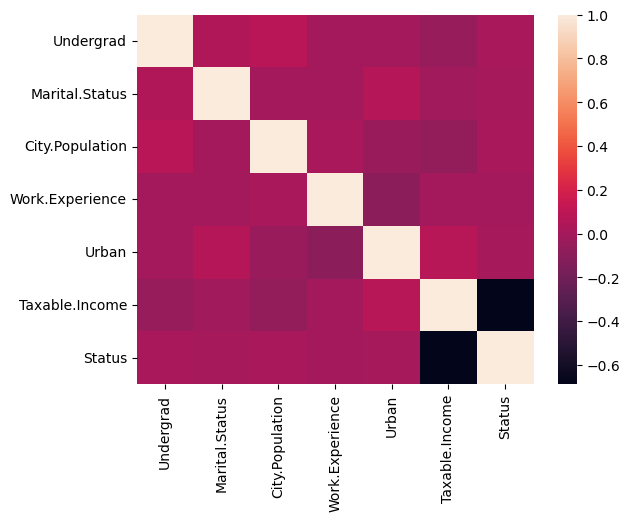

In [293]:
sns.heatmap(data.corr())

In [271]:
data['Undergrad'].value_counts(),data['Marital.Status'].value_counts(),data['Urban'].value_counts(),data['Status'].value_counts()
# Value counts of categorical columns

(YES    312
 NO     288
 Name: Undergrad, dtype: int64,
 Single      217
 Married     194
 Divorced    189
 Name: Marital.Status, dtype: int64,
 YES    302
 NO     298
 Name: Urban, dtype: int64,
 Good     476
 Risky    124
 Name: Status, dtype: int64)

In [272]:
data


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income,Status
0,NO,Single,50047,10,YES,68833,Good
1,YES,Divorced,134075,18,YES,33700,Good
2,NO,Married,160205,30,YES,36925,Good
3,YES,Single,193264,15,YES,50190,Good
4,NO,Married,27533,28,NO,81002,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,76340,Good
596,YES,Divorced,55369,2,YES,69967,Good
597,NO,Divorced,154058,0,YES,47334,Good
598,YES,Married,180083,17,NO,98592,Good


# Encoding the Categorical columns

In [273]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])
data['Undergrad'] = le.fit_transform(data['Undergrad'])
data['Urban'] = le.fit_transform(data['Urban'])
data['Marital.Status'] = le.fit_transform(data['Marital.Status'])

In [274]:
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income,Status
0,0,2,50047,10,1,68833,0
1,1,0,134075,18,1,33700,0
2,0,1,160205,30,1,36925,0
3,1,2,193264,15,1,50190,0
4,0,1,27533,28,0,81002,0
...,...,...,...,...,...,...,...
595,1,0,39492,7,1,76340,0
596,1,0,55369,2,1,69967,0
597,0,0,154058,0,1,47334,0
598,1,1,180083,17,0,98592,0


In [275]:
data['Status'].value_counts()

0    476
1    124
Name: Status, dtype: int64

In [288]:
X = data.iloc[:,:-2]
Y = data['Status']

In [289]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [278]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=42,test_size=0.2)


# DT using Entropy criterion

In [279]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=10)

In [280]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((480, 5), (120, 5), (480,), (120,))

In [281]:
y_train

145    0
9      0
375    0
523    0
188    1
      ..
71     0
106    1
270    0
435    0
102    0
Name: Status, Length: 480, dtype: int32

In [282]:
model = dt.fit(x_train,y_train)

In [283]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [284]:
from sklearn.metrics import accuracy_score

In [285]:
accuracy_score(y_train,train_pred)

0.8479166666666667

In [286]:
accuracy_score(y_test,test_pred)

0.7583333333333333

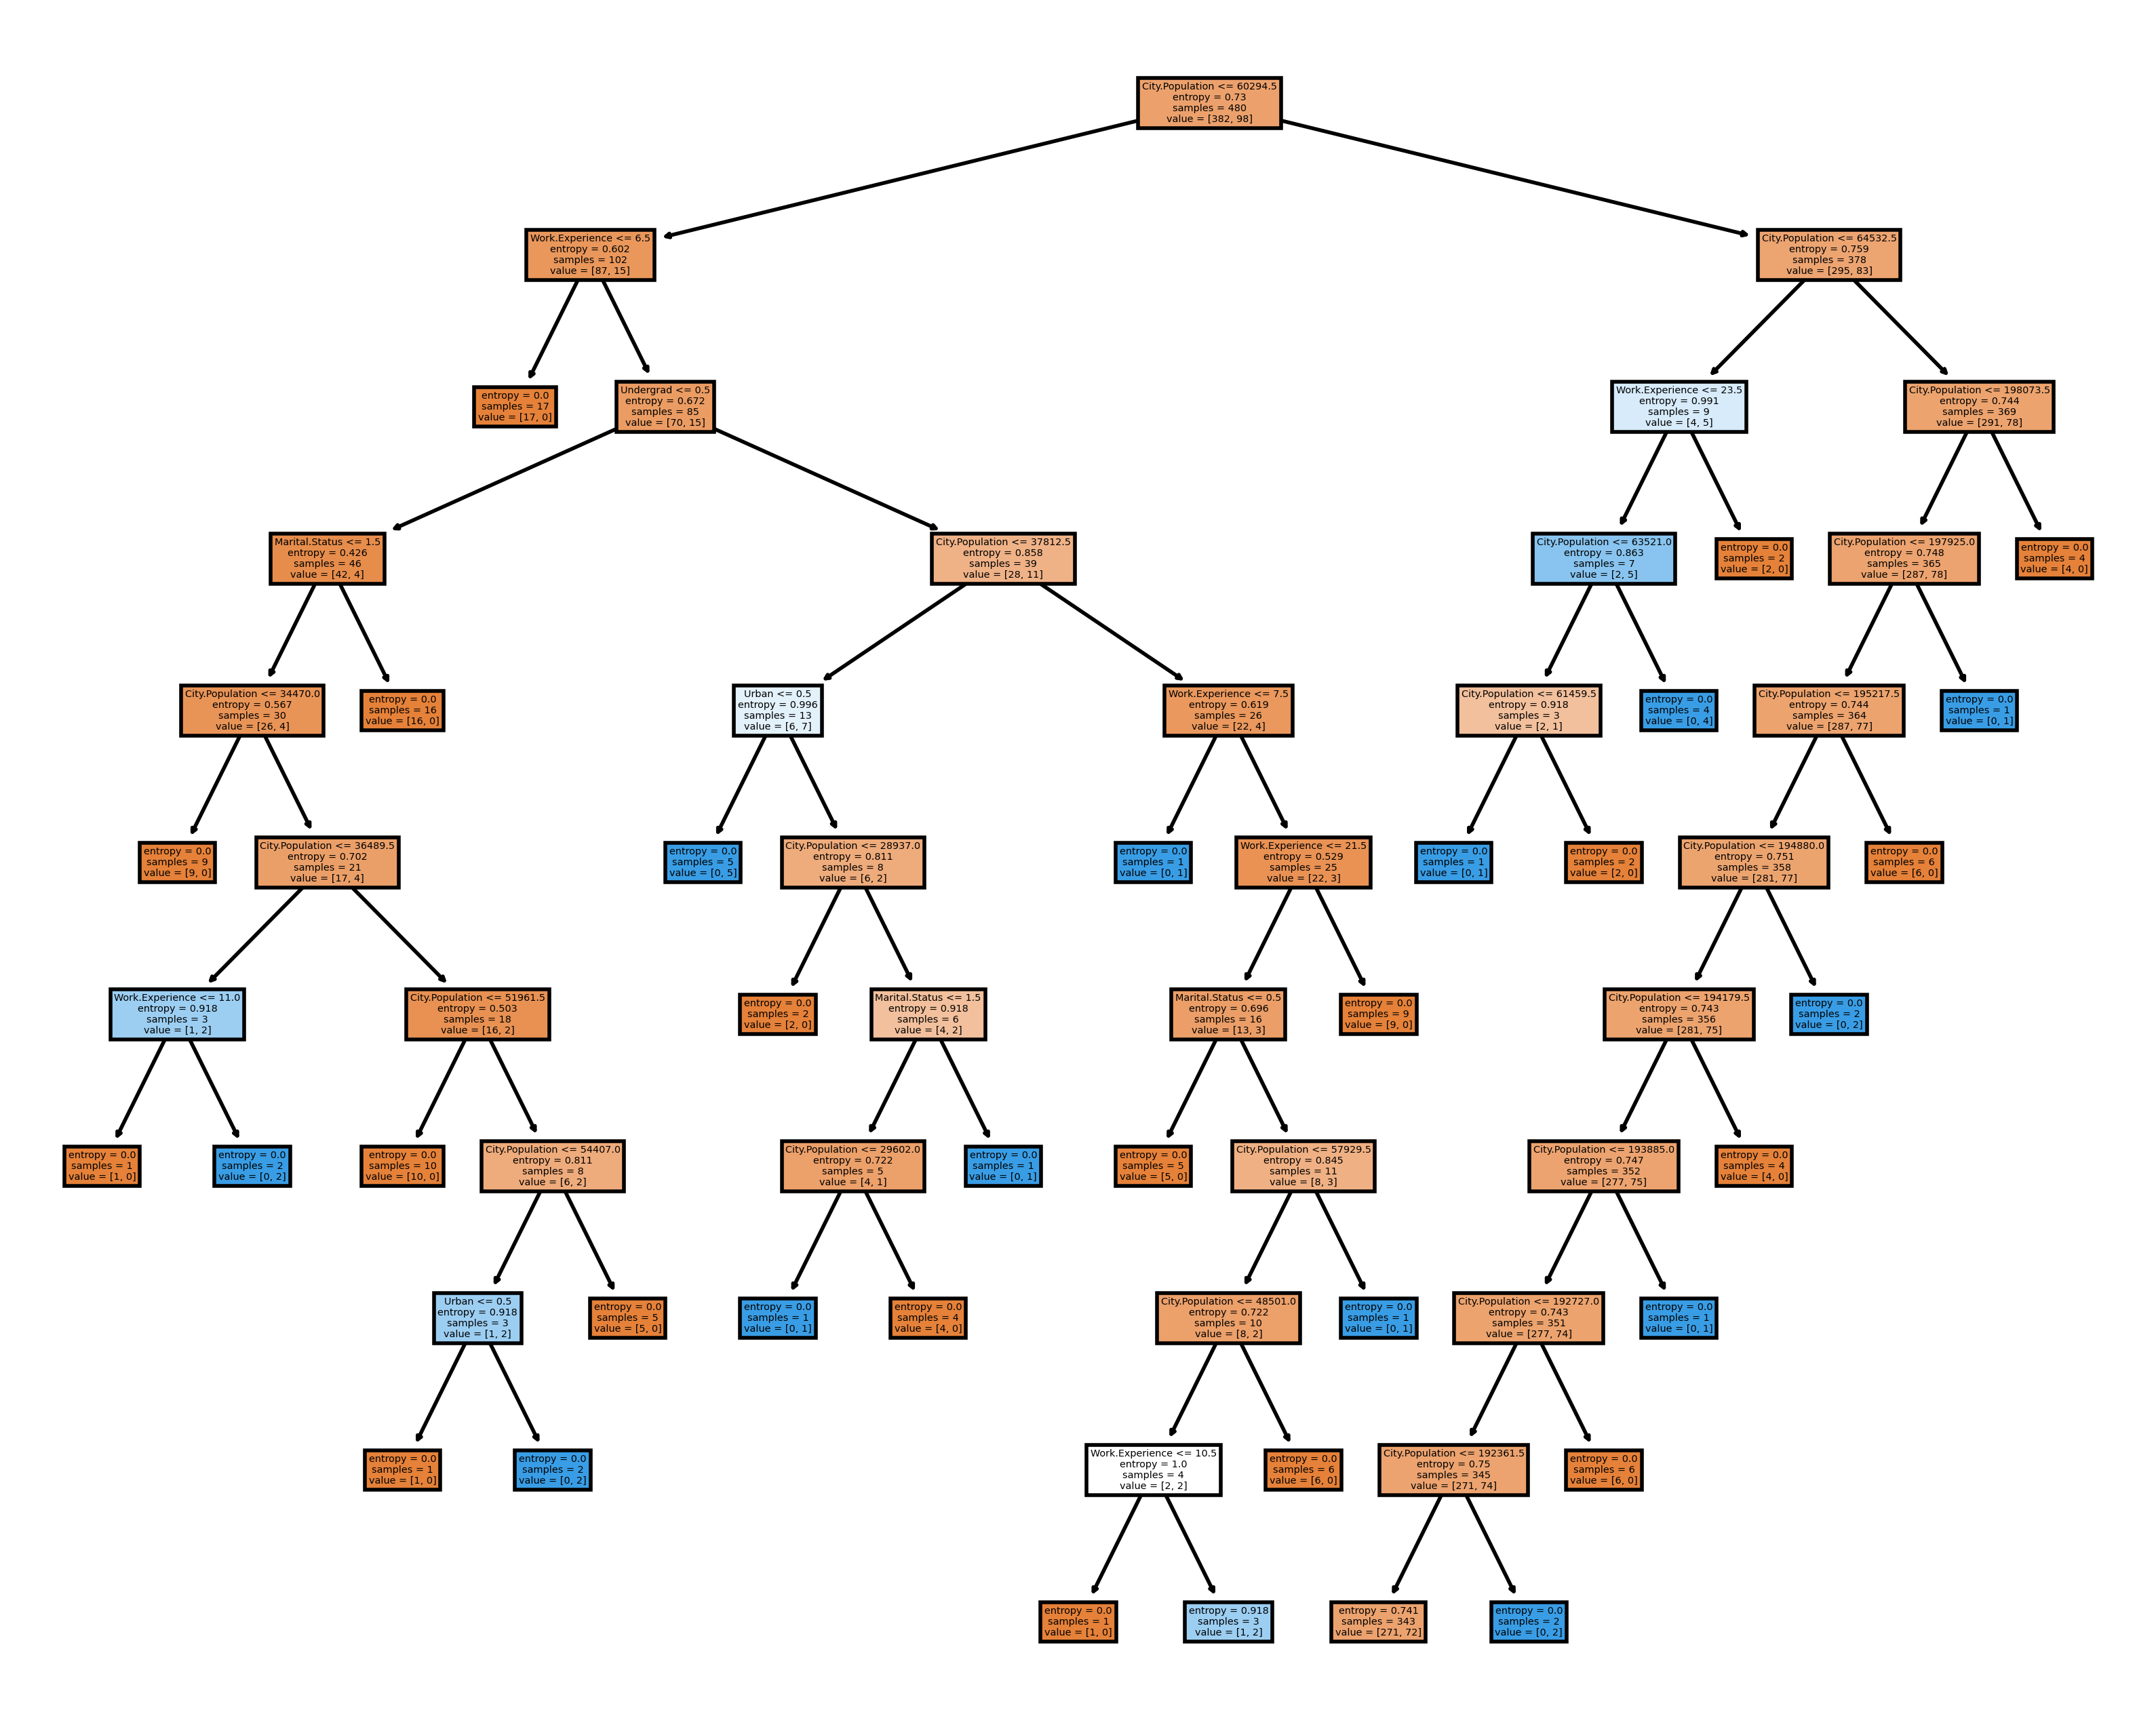

In [287]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8),dpi=400);
plot_tree(model,feature_names=X.columns,filled=True);

# Lets check the model accuracy using Gini criterion

In [252]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=10)

In [253]:
model1 = dt1.fit(x_train,y_train)

train_pred1 = model1.predict(x_train)
test_pred1 = model1.predict(x_test)

In [254]:
accuracy_score(y_train,train_pred1)

0.8979166666666667

In [255]:
accuracy_score(y_test,test_pred1)

0.7166666666666667

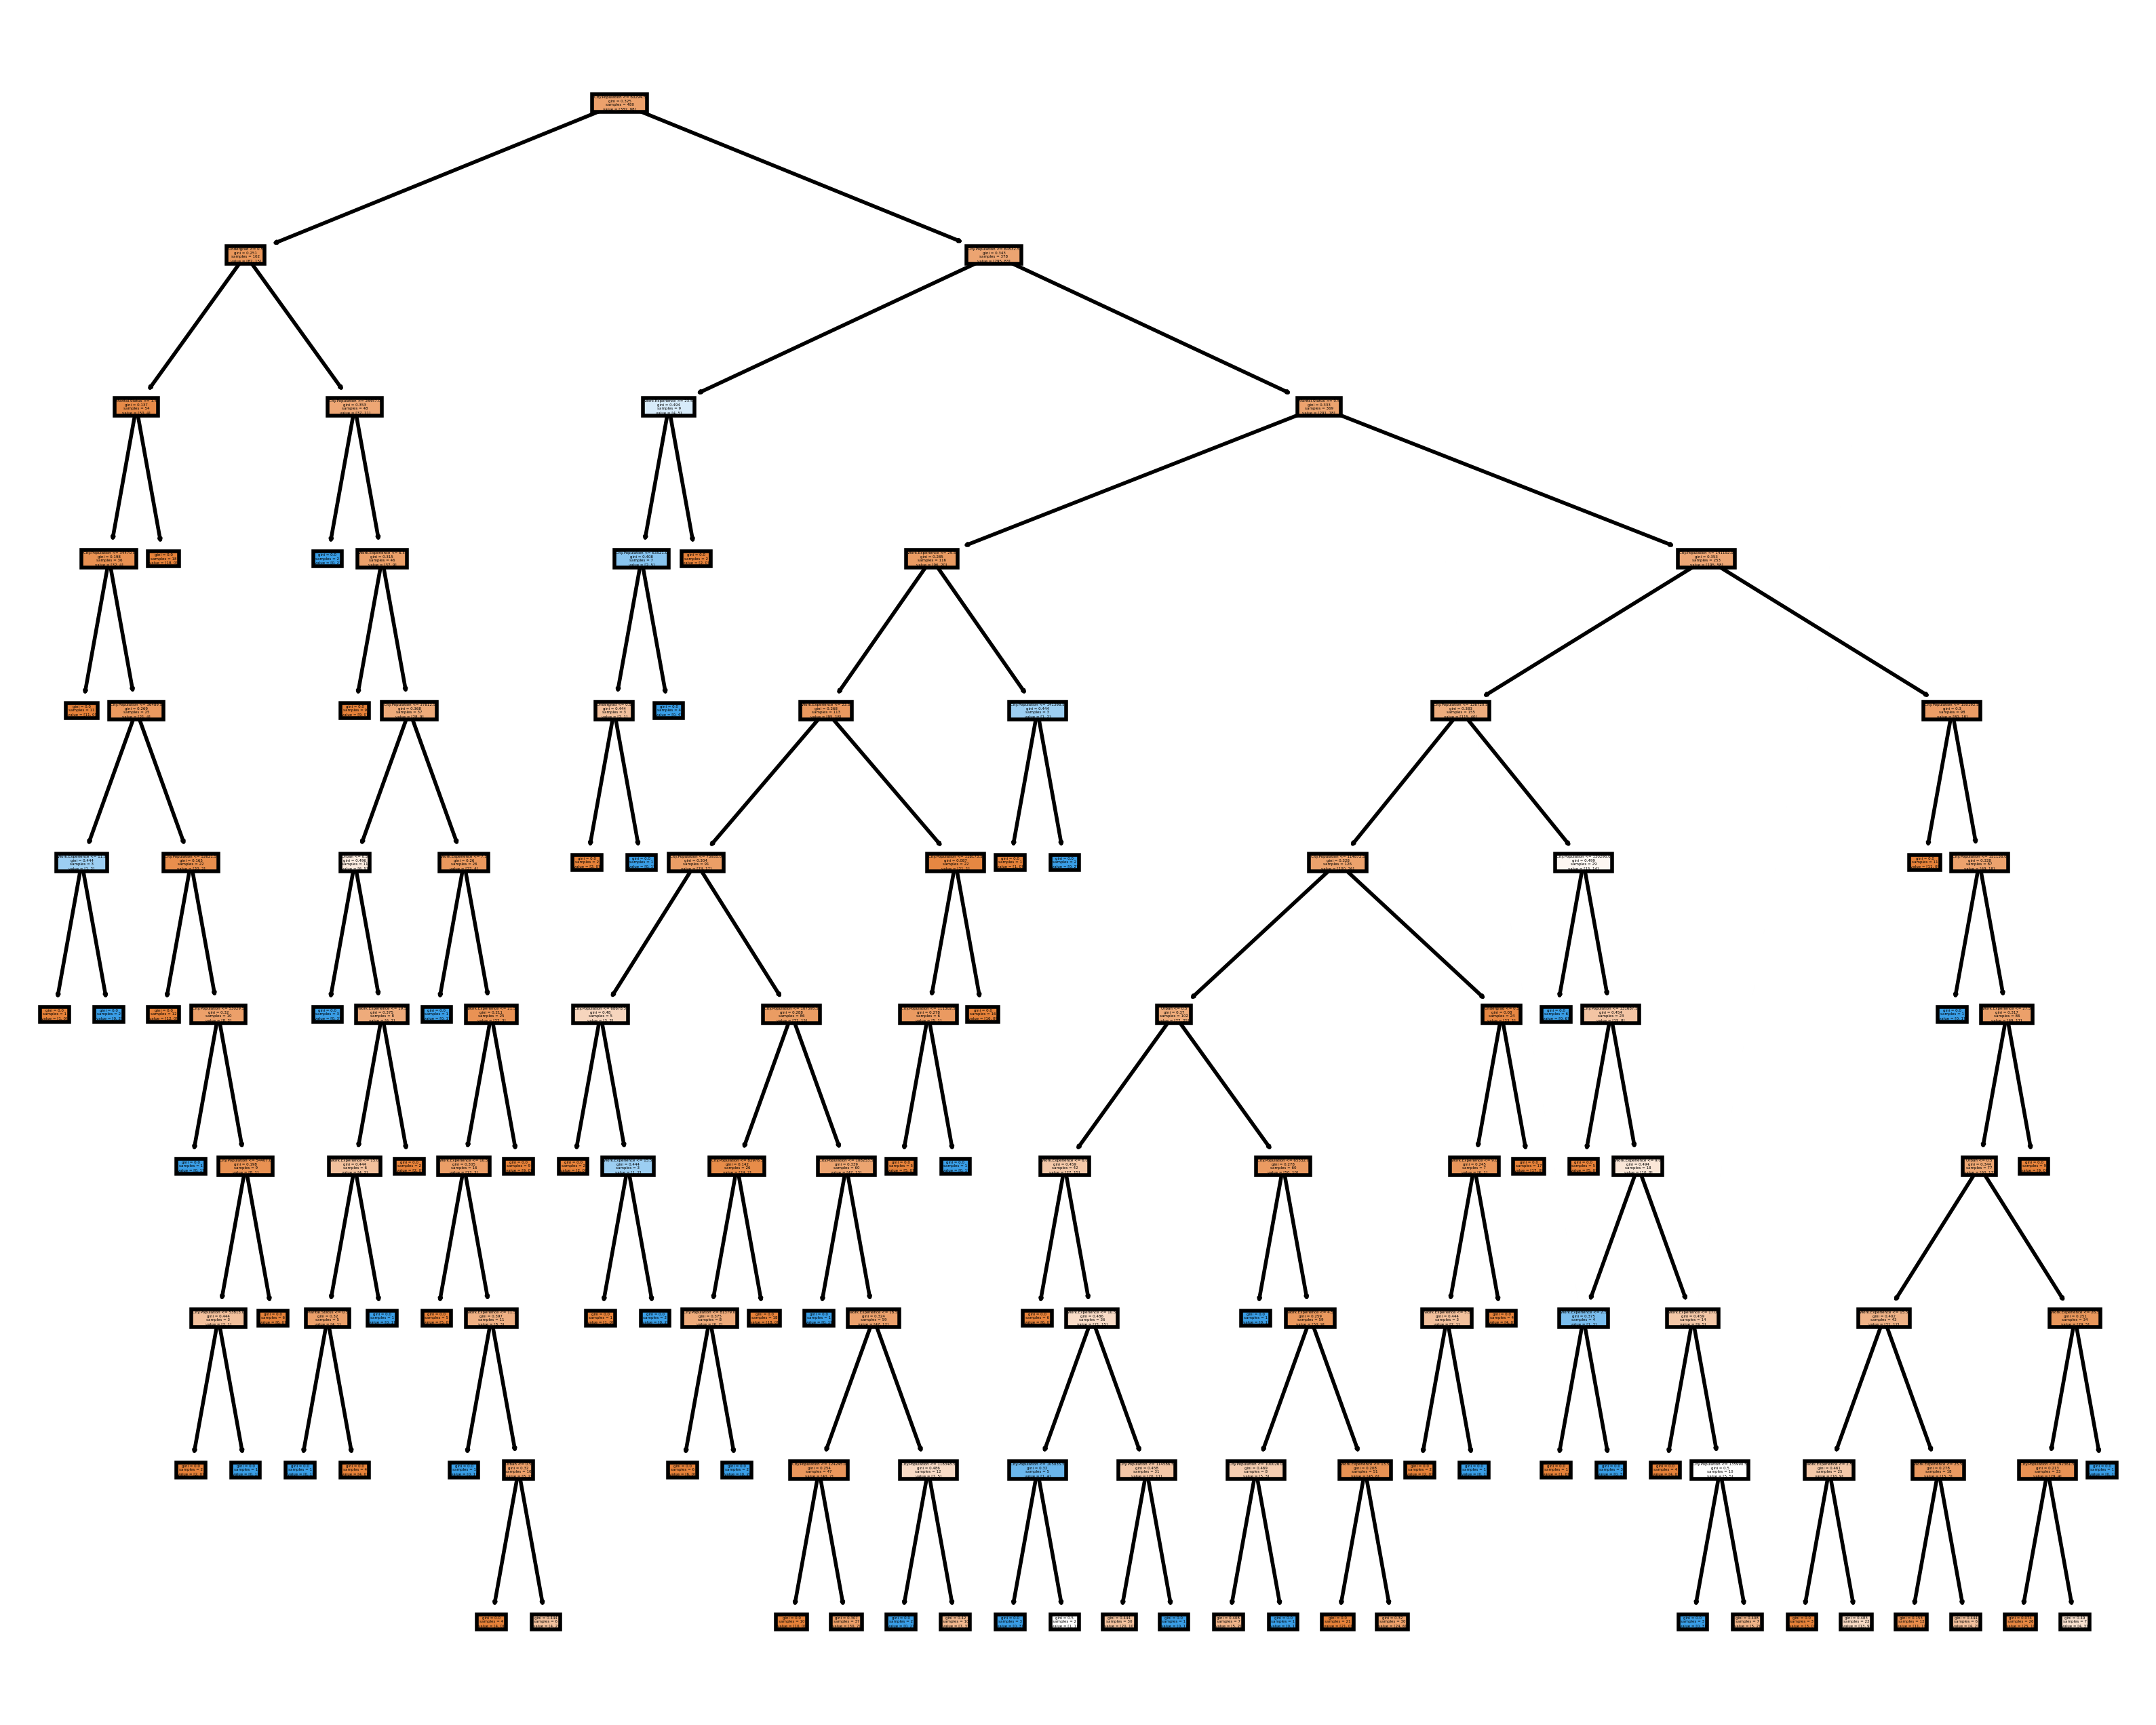

In [256]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8),dpi=400);
plot_tree(model1,feature_names=X.columns,filled=True);

In [257]:
test_data =pd.DataFrame({'Undergrad':0,'Marital.Status':2,'City.Population':17000,'Work.Experience':20,'Urban':1},index=[1])
test_data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
1,0,2,17000,20,1


In [259]:
model.predict(test_data)

array([0])

# It says the test data is 'Risky'